In [1]:
import fishts
import fishts.transformers as t
from fishts.descriptors.time_series import extract_ts_descriptor
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import hdbscan
import tqdm
from dtaidistance import dtw

In [2]:
paths = []

square_paths = glob.glob('../data/geometry/square/*.png')[:100]
triangle_paths = glob.glob('../data/geometry/triangle/*.png')[:100]
star_paths = glob.glob('../data/geometry/star/*.png')[:100]
circle_paths = glob.glob('../data/geometry/circle/*.png')[:100]

paths.extend(square_paths)
paths.extend(triangle_paths)
paths.extend(star_paths)
paths.extend(circle_paths)

In [105]:
time_series = []
angles = 720

transforms = t.Compose([
    t.ConvertColor(cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=300),
    t.GaussianBlur(kernel_size=(5,5), sigma_x=0),
    t.Threshold(60, 255, cv2.THRESH_BINARY),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
])

for path in tqdm.tqdm(paths):
    image = cv2.imread(path)
    transformed = transforms(image)

    ts = extract_ts_descriptor(transformed, start_angle=0, end_angle=angles, step=1)
    time_series.append(ts)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:18<00:00,  5.09it/s]


In [106]:
time_series = np.array(time_series)
time_series.shape

(400, 720)

In [107]:
distance_matrix = dtw.distance_matrix_fast(time_series)

In [108]:
distance_matrix.shape

(400, 400)

In [109]:
model = hdbscan.HDBSCAN(metric='precomputed', gen_min_span_tree=True, min_cluster_size=50, min_samples=3)
model

HDBSCAN(gen_min_span_tree=True, metric='precomputed', min_cluster_size=50,
        min_samples=3)

In [110]:
model.fit(distance_matrix)

HDBSCAN(gen_min_span_tree=True, metric='precomputed', min_cluster_size=50,
        min_samples=3)

In [111]:
# model.labels_
unique, counts = np.unique(model.labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[-1, 45],
       [ 0, 86],
       [ 1, 79],
       [ 2, 96],
       [ 3, 94]], dtype=int64)

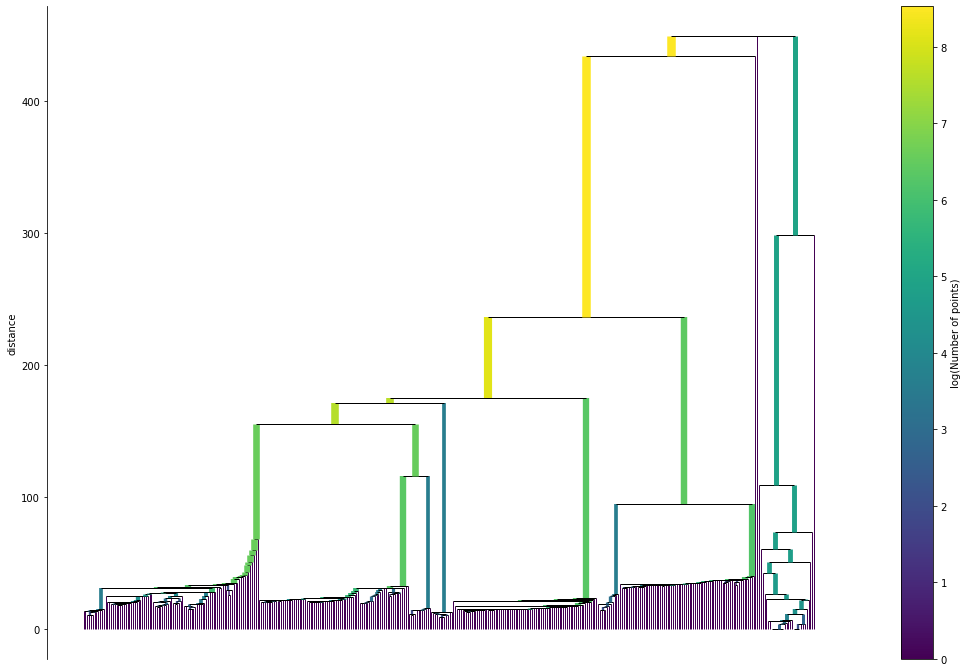

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
model.single_linkage_tree_.plot(cmap='viridis', colorbar=True, axis=ax)
plt.show()

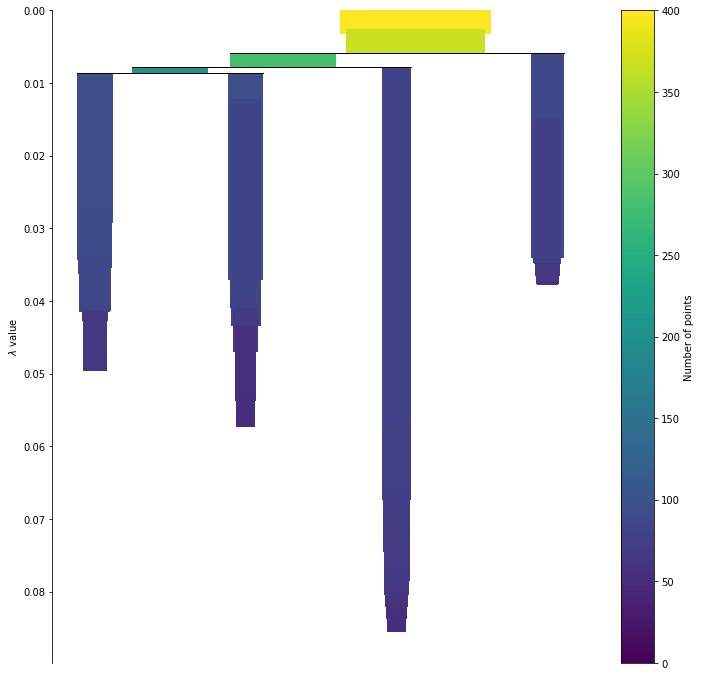

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
model.condensed_tree_.plot(axis=ax)
plt.show()

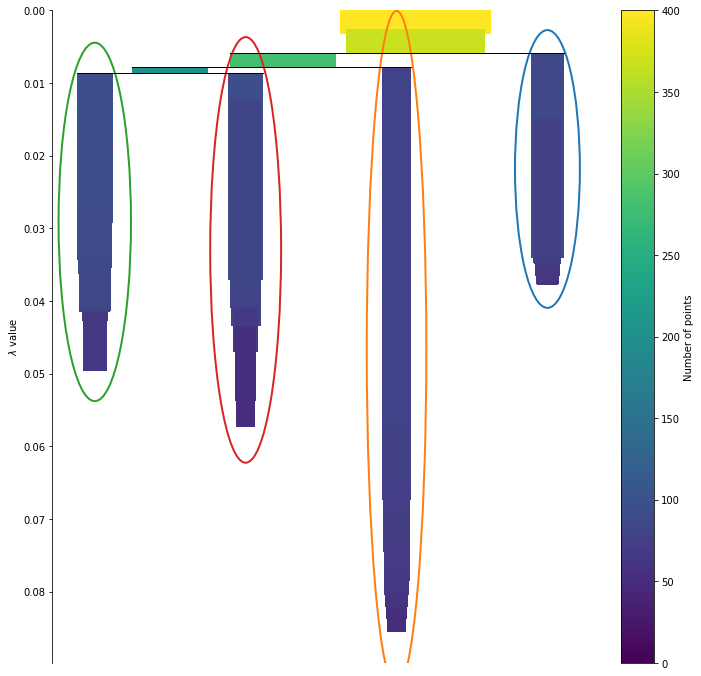

In [103]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
model.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette(), axis=ax)
plt.show()

In [113]:
from sklearn.metrics import silhouette_score
silhouette_score(distance_matrix, model.labels_, metric='precomputed')

0.6148010644395707

In [117]:
classes = [path.split('\\')[0].split('/')[-1] for path in paths]
for _class, label in zip(classes, list(model.labels_)):
    print(f'Class: {_class} - Label {label}')

Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label -1
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label -1
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square - Label 2
Class: square 